## **Skyletics**


In [40]:
#Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import learning_curve



## Data Loading

In [41]:
#Load the datasets using pandas
landing_data = pd.read_csv('Air_Traffic_Landings_Statistics-2.csv')
passenger_data = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

## Combine the two datasets

In [42]:
combined_data = pd.merge(landing_data, passenger_data, on=['Activity Period', 'Operating Airline'])

## Exploratory Data Analysis(EDA)

In [43]:
# Display the first few rows of the combined dataset to understand its structure
combined_data.tail(10)

,Activity Period,Operating Airline,Operating Airline IATA Code_x,Published Airline_x,Published Airline IATA Code_x,GEO Summary_x,GEO Region_x,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,...,Operating Airline IATA Code_y,Published Airline_y,Published Airline IATA Code_y,GEO Summary_y,GEO Region_y,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
205711,202306,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Passenger,Wide Body,Boeing,...,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,14052
205712,202306,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Passenger,Wide Body,Boeing,...,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,16954
205713,202306,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Passenger,Narrow Body,Boeing,...,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,14195
205714,202306,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Passenger,Narrow Body,Boeing,...,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,16705
205715,202306,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Passenger,Narrow Body,Boeing,...,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,14195
205716,202306,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Passenger,Narrow Body,Boeing,...,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,16705
205717,202306,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Passenger,Narrow Body,Boeing,...,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,14195
205718,202306,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Passenger,Narrow Body,Boeing,...,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,16705
205719,202306,ZIPAIR Tokyo Inc,ZG,ZIPAIR Tokyo Inc,ZG,International,Asia,Passenger,Wide Body,Boeing,...,ZG,ZIPAIR Tokyo Inc,ZG,International,Asia,Deplaned,Other,International,A,4624
205720,202306,ZIPAIR Tokyo Inc,ZG,ZIPAIR Tokyo Inc,ZG,International,Asia,Passenger,Wide Body,Boeing,...,ZG,ZIPAIR Tokyo Inc,ZG,International,Asia,Enplaned,Other,International,A,5956


In [44]:
# Check for duplicates
duplicates = combined_data[combined_data.duplicated()]

# drop the duplicates
combined_data = combined_data.drop_duplicates()

# Save the DataFrame with duplicates removed to a new CSV file
combined_data.to_csv("clean_combined_data.csv", index=False)

# Print the number of duplicates found
print(f"Number of duplicates found: {len(duplicates)}")

Number of duplicates found: 8


Identified and removes duplicate rows from a DataFrame 'combined_data', saves the cleaned data to a new CSV file, and then showing 8 duplicate rows were identified and removed.

In [45]:
# Check data types and missing values
print("Combined Data Info:")
combined_data.info()

Combined Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 205713 entries, 0 to 205720
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Activity Period                205713 non-null  int64 
 1   Operating Airline              205713 non-null  object
 2   Operating Airline IATA Code_x  205537 non-null  object
 3   Published Airline_x            205713 non-null  object
 4   Published Airline IATA Code_x  205537 non-null  object
 5   GEO Summary_x                  205713 non-null  object
 6   GEO Region_x                   205713 non-null  object
 7   Landing Aircraft Type          205713 non-null  object
 8   Aircraft Body Type             205713 non-null  object
 9   Aircraft Manufacturer          205713 non-null  object
 10  Aircraft Model                 205713 non-null  object
 11  Aircraft Version               200547 non-null  object
 12  Landing Count           

In [46]:
# Generate summary statistics for numerical columns
print("Summary Statistics for Combined Data:")
print("\n")
combined_data.describe()

Summary Statistics for Combined Data:




,Activity Period,Landing Count,Total Landed Weight,Passenger Count
count,205713.000000,205713.000000,2.057130e+05,205713.000000
mean,201504.404617,161.262074,2.880699e+07,49229.574106
std,514.692197,299.674031,4.286837e+07,95868.471621
min,200507.000000,1.000000,7.000000e+03,1.000000
25%,201103.000000,17.000000,3.554950e+06,4181.000000
50%,201604.000000,38.000000,1.178000e+07,10998.000000
75%,201908.000000,124.000000,3.412200e+07,38447.000000
max,202306.000000,2245.000000,2.758400e+08,659837.000000


In [47]:
# Check for missing values
combined_data.isnull().sum()

Activity Period                     0
Operating Airline                   0
Operating Airline IATA Code_x     176
Published Airline_x                 0
Published Airline IATA Code_x     176
GEO Summary_x                       0
GEO Region_x                        0
Landing Aircraft Type               0
Aircraft Body Type                  0
Aircraft Manufacturer               0
Aircraft Model                      0
Aircraft Version                 5166
Landing Count                       0
Total Landed Weight                 0
Operating Airline IATA Code_y     176
Published Airline_y                 0
Published Airline IATA Code_y     176
GEO Summary_y                       0
GEO Region_y                        0
Activity Type Code                  0
Price Category Code                 0
Terminal                            0
Boarding Area                       0
Passenger Count                     0
dtype: int64

## Data Visualization

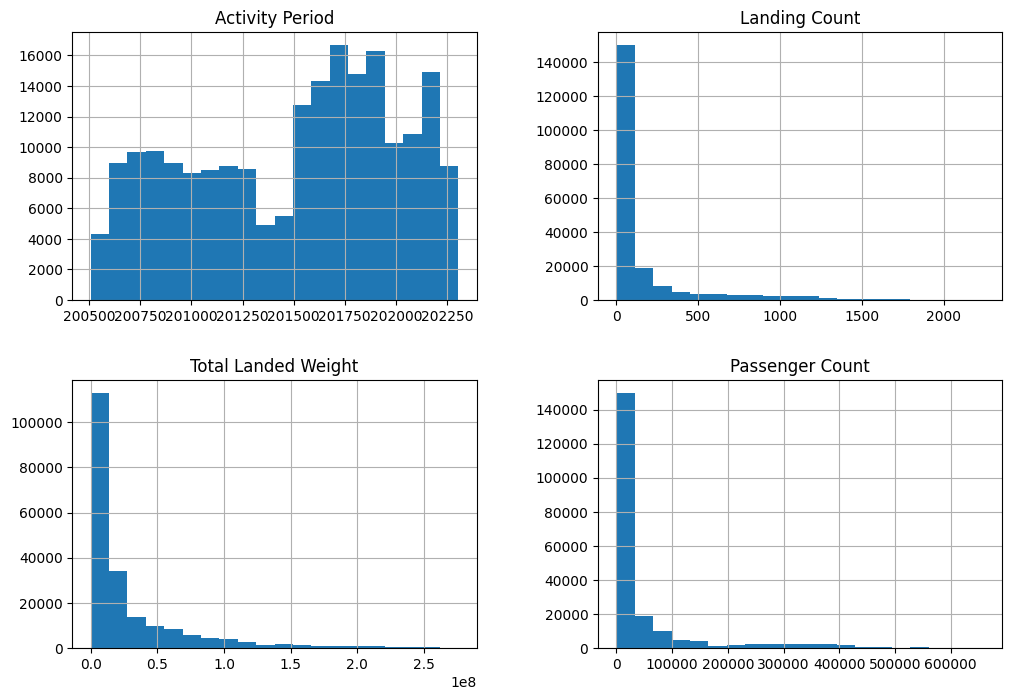

In [48]:
# Histograms for numerical cols
combined_data.hist(bins=20, figsize=(12, 8))
plt.show()

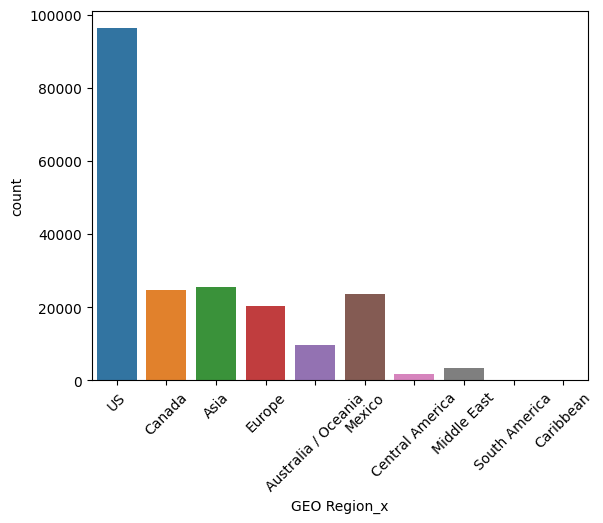

In [49]:
sns.countplot(data=combined_data, x='GEO Region_x')
plt.xticks(rotation=45)
plt.show()

### US has the highest number of passengers followed by Canada then Europe. while Caribbean, South America and Middle Est has reported 0 passengers.

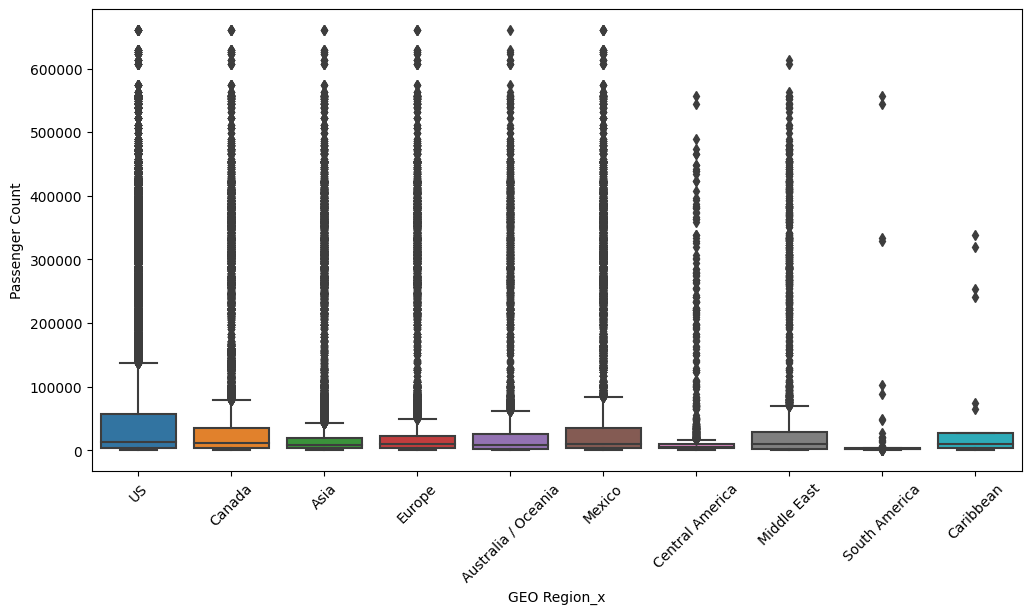

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x="GEO Region_x", y="Passenger Count")
plt.xticks(rotation=45)
plt.show()

###The US region has a notably higher median passenger count compared to other regions.

###Many regions, such as Asia, Europe, Australia/Oceania, Mexico, and Central America, have a large number of outliers, suggesting that there are specific instances with unusually high or low passenger counts in these regions.

###The Middle East and Caribbean have narrower IQRs, indicating that the passenger counts in these regions are more consistent without a vast range of variability.

###South America's box plot is very close to the x-axis with a few outliers, suggesting that, typically, the passenger count is low, but there are a few instances with a higher number.

In [51]:
#subset of numeric columns
numeric_data = combined_data.select_dtypes(include=[np.number])
numeric_data

,Activity Period,Landing Count,Total Landed Weight,Passenger Count
0,200507,2,396000,27271
1,200507,2,396000,29131
2,200507,2,396000,5415
3,200507,167,37408000,27271
4,200507,167,37408000,29131
...,...,...,...,...
205716,202306,30,3876000,16705
205717,202306,43,6290900,14195
205718,202306,43,6290900,16705
205719,202306,21,7980000,4624


## Heatmap

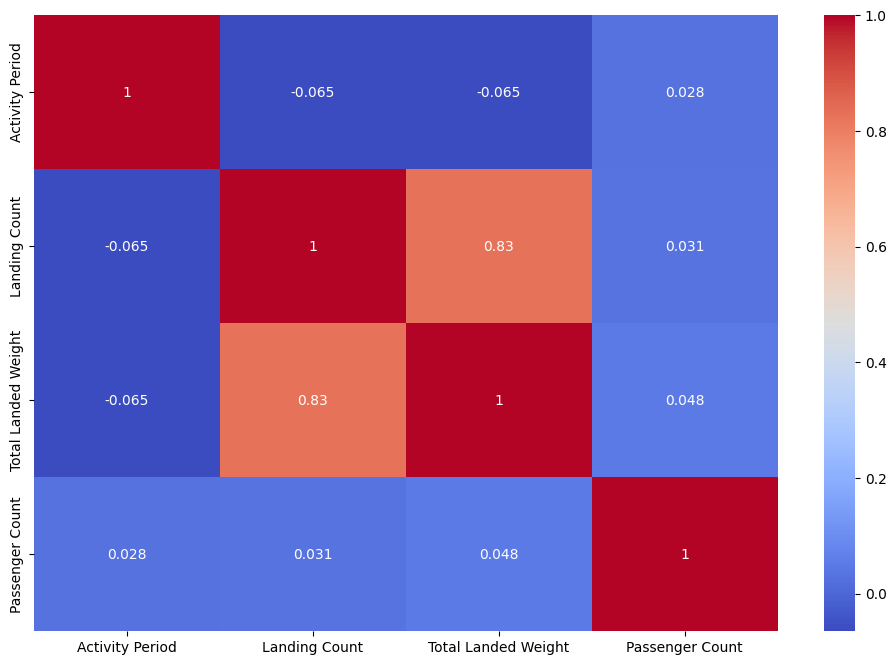

In [52]:
# Correlation heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

###The strongest positive correlation is between "Landing Count" and "Total Landed Weight" i.e 0.83. Others are weak and could be insignificant.

## Check for Outliers

####Find and remove rows from 'combined_data' dataframe, that contain outlier values (based on Z-scores) in the specified numeric columns.

In [53]:
#excluding 'activity perriod'
numeric_columns = [
    'Landing Count',
    'Total Landed Weight',
    'Passenger Count'
]

z_scores = np.abs((combined_data[numeric_columns] - combined_data[numeric_columns].mean()) / combined_data[numeric_columns].std())

#implying any value more than 3 standard deviations away from the mean is considered an outlier.
outlier_threshold = 3

#For each row in z_scores, checks if any of its columns have a Z-score greater than the threshold, produces a boolean mask
outlier_mask = (z_scores > outlier_threshold).any(axis=1)

#prints the rows from combined_data which have outliers in any of the specified numeric columns.
print("Rows with Outliers:")
print(combined_data[outlier_mask])

#filtering out the outlier rows
combined_data = combined_data[~outlier_mask]

Rows with Outliers:
        Activity Period Operating Airline Operating Airline IATA Code_x  \
252              200507  SkyWest Airlines                            OO   
253              200507  SkyWest Airlines                            OO   
254              200507  SkyWest Airlines                            OO   
255              200507  SkyWest Airlines                            OO   
256              200507  SkyWest Airlines                            OO   
...                 ...               ...                           ...   
205620           202306   United Airlines                            UA   
205650           202306   United Airlines                            UA   
205651           202306   United Airlines                            UA   
205681           202306   United Airlines                            UA   
205682           202306   United Airlines                            UA   

                     Published Airline_x Published Airline IATA Code_x  \
252  

## Statistical Tests

In [54]:
#'Passenger Count' as a linear function of 'Landing Count' and 'Total Landed Weight' using the ordinary least squares method

# Define the independent variables (features) and the dependent variable
X = combined_data[['Landing Count', 'Total Landed Weight']]
y = combined_data['Passenger Count']

# Add a constant for the intercept ( y = x0 + ax1 + bx2 + cx3)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Passenger Count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     206.9
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.83e-90
Time:                        05:59:41   Log-Likelihood:            -2.3664e+06
No. Observations:              189995   AIC:                         4.733e+06
Df Residuals:                  189992   BIC:                         4.733e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.313e+04    

###With p-values this model has statistical significance, which indicates that the variables "Landing Count" and "Total Landed Weight" significantly influence the prediction of "Passenger Count."

###R-squared is quite low, indicating that other factors not included in the model may also have an impact on passenger counts. Nevertheless, the model only explains a very small amount of the variance in "Passenger Count."


In [55]:
correlation, p_value = stats.pearsonr(combined_data['Landing Count'], combined_data['Passenger Count'])

print("correlation: ",correlation, "P Value:", p_value)

if p_value < 0.05:
    print(f"Pearson Correlation: {correlation:.2f} (significant)")
else:
    print(f"Pearson Correlation: {correlation:.2f} (not significant)")

correlation:  0.046141468046156424 P Value: 4.648756479706699e-90
Pearson Correlation: 0.05 (significant)


The Pearson correlation coefficient between 'Landing Count' and 'Passenger Count' is 0.05, which indicates a very weak positive linear relationship.

The associated p-value, 1.40e-89, is extremely low, suggesting that this correlation is statistically significant.

###There is a statistically significant but very weak positive correlation between 'Landing Count' and 'Passenger Count.'

## Time Series ARIMA Model

### It checks for stationarity, decomposes the time series, determines ARIMA parameters using autocorrelations, fits an ARIMA model, and finally forecasts future passenger counts.

<ipython-input-56-f574cae23898>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Activity Period'] = pd.to_datetime(combined_data['Activity Period'], format='%Y%m')


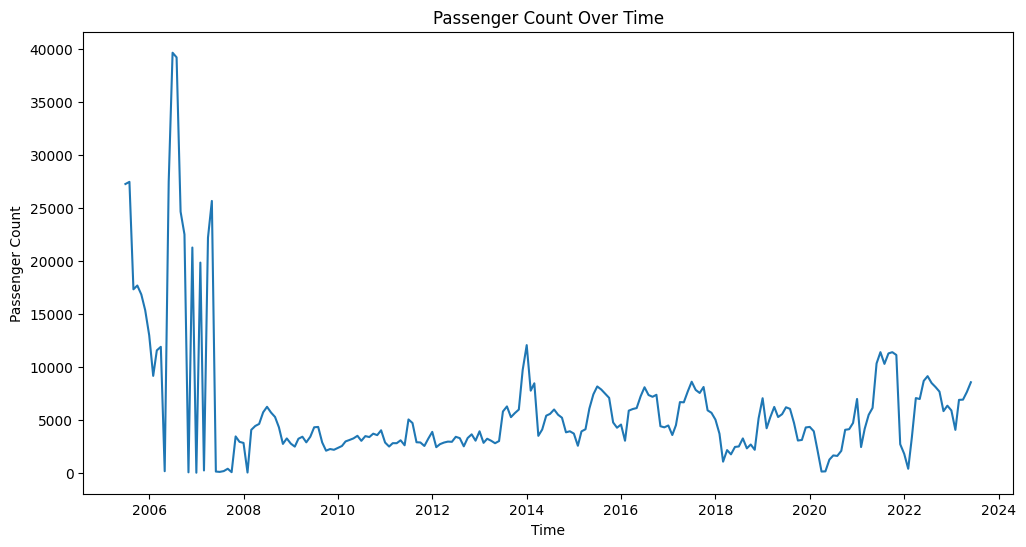

ADF Statistic: -6.299580452579297
p-value: 3.4383912428765593e-08
Is the time series stationary?  True


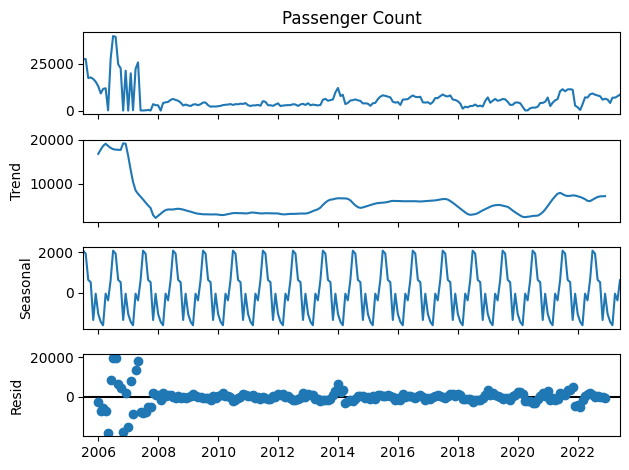

                               SARIMAX Results                                
Dep. Variable:        Passenger Count   No. Observations:                  216
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2104.895
Date:                Fri, 27 Oct 2023   AIC                           4215.790
Time:                        05:59:43   BIC                           4225.902
Sample:                    07-01-2005   HQIC                          4219.876
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4171      0.039     10.656      0.000       0.340       0.494
ma.L1         -0.8849      0.036    -24.822      0.000      -0.955      -0.815
sigma2      1.957e+07   1.02e-09   1.91e+16      0.0

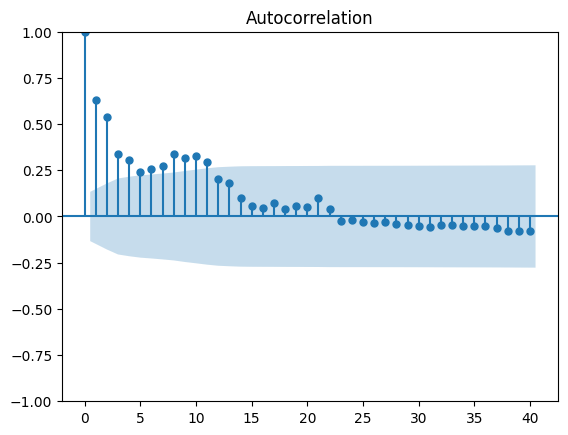

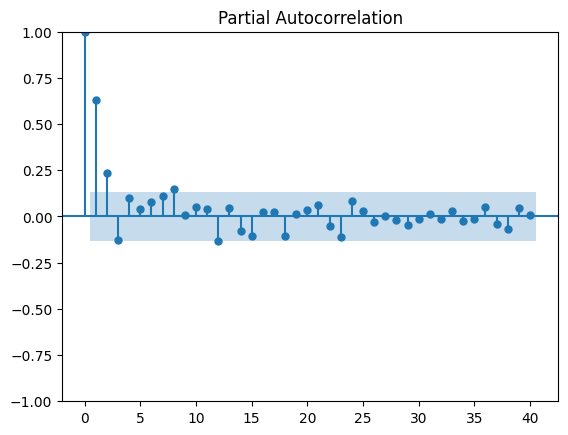

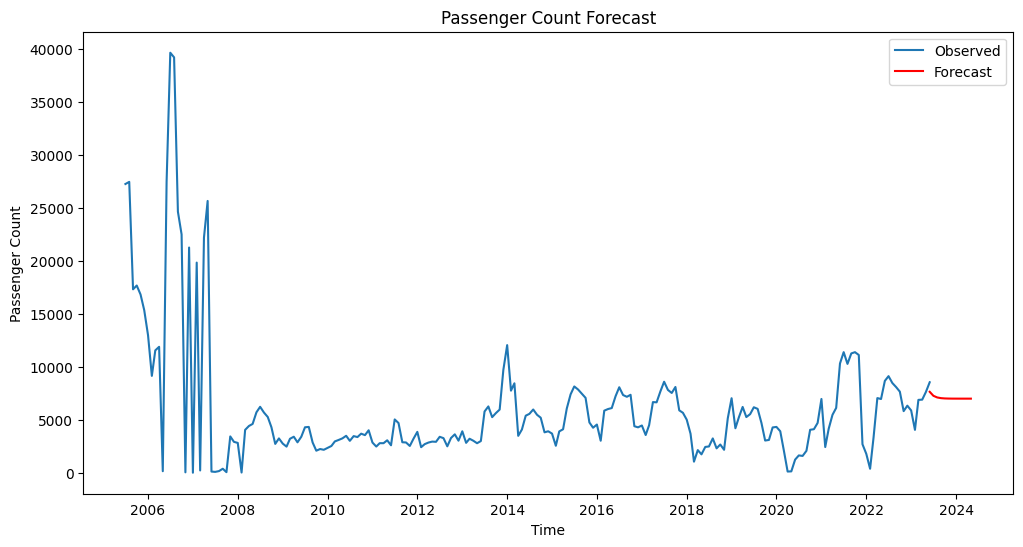

In [56]:
# Convert the 'Activity Period' column to a datetime format
combined_data['Activity Period'] = pd.to_datetime(combined_data['Activity Period'], format='%Y%m')

#removes any duplicate rows
combined_data = combined_data.drop_duplicates(subset=['Activity Period'])

#sets 'activity period' as dataset index (consistent monthly frequency)
combined_data = combined_data.set_index('Activity Period').asfreq('MS')

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Passenger Count'])
plt.title('Passenger Count Over Time')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.show()

#checking if time series is stationary or not using dicky fuller test, stationary for p <= 0.05
result = adfuller(combined_data['Passenger Count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Is the time series stationary? ', result[1] <= 0.05)

#decomposes the time series into its trend, seasonal, and residual components using an additive model.
decomposition = seasonal_decompose(combined_data['Passenger Count'], model='additive')
decomposition.plot()
plt.show()

#plotinng to determine parameters of ARIMA MODEL
plot_acf(combined_data['Passenger Count'], lags=40)
plot_pacf(combined_data['Passenger Count'], lags=40)

# Fit ARIMA model
p = 1  #autoregression
d = 1  #differencing
q = 1  #moving average

model = ARIMA(combined_data['Passenger Count'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

#Forecast passenger counts for a specified number of steps into the future, and then these forecasted values are plotted alongside the observed data.
# Generate forecasts
forecast_steps = 12
forecast_values = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Passenger Count'], label='Observed')
plt.plot(pd.date_range(start=combined_data.index[-1], periods=forecast_steps, freq='MS'), forecast_values, label='Forecast', color='red')
plt.title('Passenger Count Forecast')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

1. The ADF statistic and the corresponding extremely low p-value both show that the time series data is stationary. This implies that there is no obvious trend or seasonality in the data, which qualifies it for time series modeling and analysis without the requirement for differencing.

2. The moving average term (ma.L1) has a coefficient of roughly -0.8849. The coefficient for the autoregressive term (ar.L1) is around 0.4171. The low p-values (p < 0.001) suggest that these coefficients are statistically significant.

3. Both the autoregressive and moving average terms in the model show statistically significant coefficients, suggesting that it partially explains the underlying patterns in the data.


### Major Spike: The most conspicuous feature is the massive spike around 2007. This anomaly suggests some significant event or change during that period which drastically increased passenger counts temporarily.

### Fluctuations: The observed passenger counts have had multiple fluctuations over the years, implying that several factors may be influencing the numbers.

###Forecast: The forecast doesn't predict any dramatic rise or drop but suggests a mild rise in the counts after an initial decline.

### Linear Regression Model: "Passenger Count"

Mean Squared Error (MSE): 11389704.94
R-squared (R2): 0.23
Coefficients: [-4.76797971e+01  5.14455844e-04  6.35577536e+02 -1.32221905e+03
  3.50044909e+02 -1.58874320e+02  4.95470930e+02  6.35577532e+02
  4.95470931e+02 -1.58874320e+02  3.50044915e+02 -1.32221905e+03
  6.35577532e+02 -1.32221905e+03  3.50044914e+02 -1.58874320e+02
  4.95470930e+02  6.35577532e+02  4.95470930e+02 -1.58874320e+02
  3.50044914e+02 -1.32221905e+03  1.71999486e+03 -1.71999486e+03
  2.47679713e+03 -3.05005785e+03 -1.14673415e+03  1.71999486e+03
  0.00000000e+00 -3.52954969e+02  3.52954970e+02 -2.53391627e+03
  2.53391627e+03 -9.15652825e+02  4.64965500e+02  4.01500964e+03
 -4.01209958e+03 -3.51953871e+03  6.35577532e+02 -4.77127288e+03
  2.96223292e+03  2.15908487e+03  2.98169353e+03 -1.09106398e+03
  6.31011412e+03  5.34274851e+03 -5.84711635e+03  9.86212599e+03
  9.77831199e+02  8.71531729e+02 -1.78718455e+03  6.35577532e+02
  4.95470930e+02 -1.58874320e+02  3.50044914e+02 -1.32221905e+03
  6.35577532e+02 

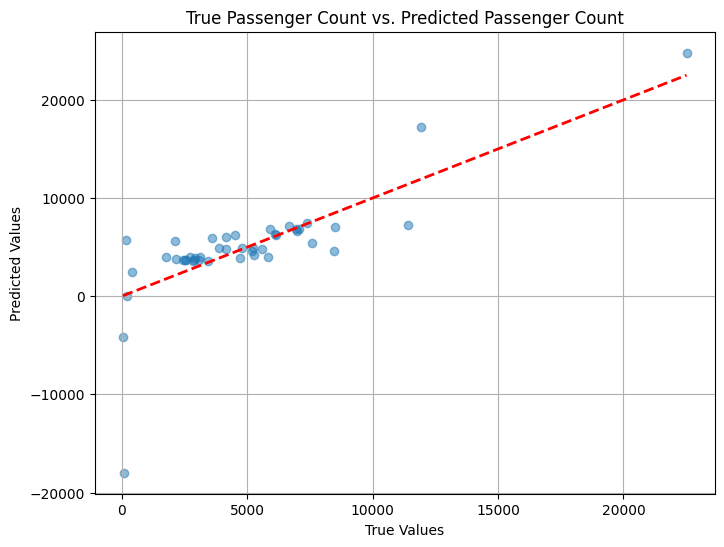

In [57]:
# One-hot encoding of categorical variables
categorical_cols = combined_data.select_dtypes(include=['object']).columns
combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_cols)

# Assuming 'Passenger Count' is the dependent variable
X = combined_data_encoded.drop('Passenger Count', axis=1)
y = combined_data_encoded['Passenger Count']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

print("Coefficients:", model.coef_)

# True vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Passenger Count vs. Predicted Passenger Count')
plt.grid(True)
plt.show()


### * Our model has a relatively good performance for predicting values in the lower range (0 to 10000). Low R-squared value makes it a good model.
### * But the model tends to under-predict as the true values increase.
### * There are a few significant outliers where the model's predictions deviate largely from the true values, which can be areas of concern.

Performance Evaluation

Mean Squared Error (MSE) for each fold: [11389704.935673   16178697.11539071 19634465.70914971 12998216.33686132
 11670719.41394439]
Average Mean Squared Error (MSE): 14374360.70
R-squared (R2) for each fold: [0.22507907 0.60492066 0.54187742 0.69192134 0.63160923]
Average R-squared (R2): 0.54


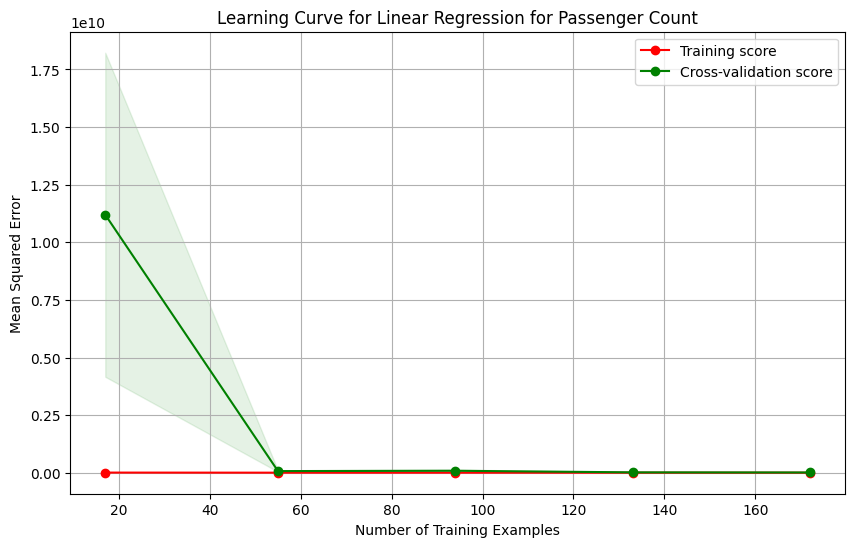

In [58]:
# One-hot encoding of categorical variables
categorical_cols = combined_data.select_dtypes(include=['object']).columns
combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_cols)


X = combined_data_encoded.drop('Passenger Count', axis=1, errors='ignore')
y = combined_data_encoded['Passenger Count']

# Cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

mse_scores = -cross_val_score(model, X, y, cv=folds, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=folds, scoring='r2')

print(f"Mean Squared Error (MSE) for each fold: {mse_scores}")
print(f"Average Mean Squared Error (MSE): {mse_scores.mean():.2f}")
print(f"R-squared (R2) for each fold: {r2_scores}")
print(f"Average R-squared (R2): {r2_scores.mean():.2f}")


#Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=folds, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Mean Squared Error")

    # Plot learning curve
    plt.plot(train_sizes, -train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, -test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Plot bands for standard deviation
    plt.fill_between(train_sizes, -train_scores_mean - train_scores_std,
                     -train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, -test_scores_mean - test_scores_std,
                     -test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.legend()
    plt.grid()
    plt.show()

# Call the function to plot the learning curve
plot_learning_curve(model, X, y, title="Learning Curve for Linear Regression for Passenger Count")


###After cross validation:

###Model's performance varies depending on the data subset (or fold) it's tested on. While it performs well on some folds (e.g., the second and fourth folds), its performance is less impressive on others, particularly the first and third folds.

###The average MSE and R2 values give a general sense of the model's overall prediction error and goodness of fit, respectively.


###As per Learning Curve:

###*  The model starts with a low error on the training set when trained on a small number of examples but has a high error on the cross-validation set, indicating overfitting.

###*  As more training examples are added, the training error goes up (model becomes less "over-optimistic"), and the cross-validation error decreases (model generalizes better).

###*  Eventually, both errors converge, suggesting that it has reached a balance between fitting the training data and generalizing to new, unseen data.

###*  The relatively close convergence of the two lines indicates that the model may benefit marginally from additional data, but significant performance gains might require other approaches such as feature engineering or model tuning.
